# Creates the CDF used to empirically sample subgiants

In [1]:
from surp import subgiants
import scipy
import numpy as np
import matplotlib.pyplot as plt
import arya
from statsmodels.distributions import ECDF
import pandas as pd

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
import surp

In [3]:
R = subgiants.R_gal[np.isfinite(subgiants.R_gal)]

Text(0, 0.5, 'counts')

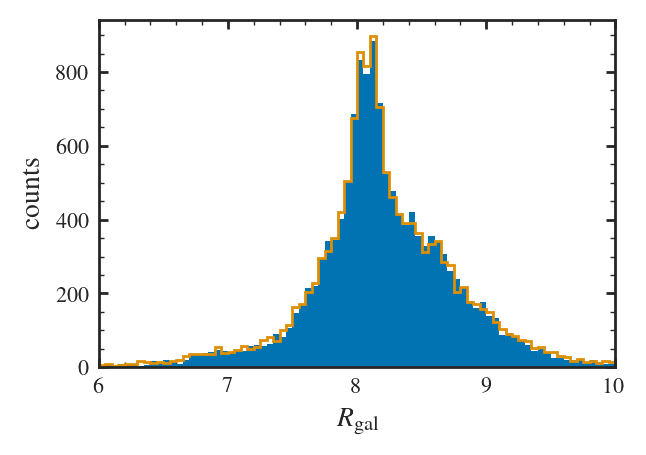

In [4]:
bins = np.arange(0, 20, 0.05)
counts, _, _ = plt.hist(R, bins=bins)

R2 = subgiants.R_gal_gaia[np.isfinite(subgiants.R_gal_gaia)]
plt.hist(R2, bins=bins, histtype="step")
plt.xlim(6, 10)
plt.xlabel(r"$R_{\rm gal}$")
plt.ylabel("counts")

In [5]:
cdf = ECDF(R)

In [6]:
max_R = 15.5
R_sample = np.arange(0, max_R, 0.01)
norm_cdf = cdf(R_sample)/cdf(max_R)
table = pd.DataFrame({"R": R_sample, "cdf": norm_cdf})

In [7]:
table.to_csv(surp.DATA_DIR + "/R_subgiants_cdf.csv")

In [8]:
df = surp.vice_utils.load_cdf()

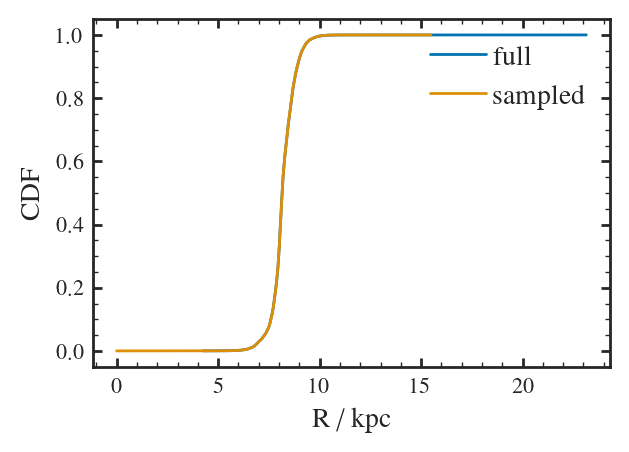

In [9]:

plt.plot(cdf.x, cdf.y, label="full")
plt.plot(df.R, df.cdf, label="sampled")
plt.xlabel("R / kpc")
plt.ylabel("CDF")
arya.Legend()

In [10]:
subgiants.R_gal - subgiants.R_gal_gaia

APOGEE_ID
b'2M00002185+1459100'    -0.004843
b'2M00004159+6505249'    -0.022722
b'2M00004251+5643075'    -0.026553
b'2M00005728+6958488'    -0.006413
b'2M00012854+7021553'    -0.047777
                           ...    
b'2M23582628+5524124'    -0.014473
b'2M23582727+5606296'    -0.001924
b'2M23590547+1514580'     0.001059
b'2M23594577-7351233'    16.272012
b'2M23594945+1445256'     0.198652
Length: 14066, dtype: float64

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 7.000e+00,
        3.000e+00, 4.000e+00, 3.000e+00, 5.000e+00, 9.000e+00, 7.000e+00,
        1.100e+01, 1.400e+01, 2.100e+01, 2.100e+01, 2.400e+01, 3.200e+01,
        4.400e+01, 5.800e+01, 1.030e+02, 1.750e+02, 3.110e+02, 6.290e+02,
        1.450e+03, 8.312e+03, 1.372e+03, 3.940e+02, 1.910e+02, 1.370e+02,
        7.600e+01, 6.100e+01, 4.500e+01, 2.500e+01, 1.300e+01, 1.800e+01,
        1.500e+01, 1.200e+01, 5.000e+00, 6.000e+00, 7.000e+00, 3.000e+00,
        6.000e+00, 8.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 3.000e+00,
        2.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 2.000e+0

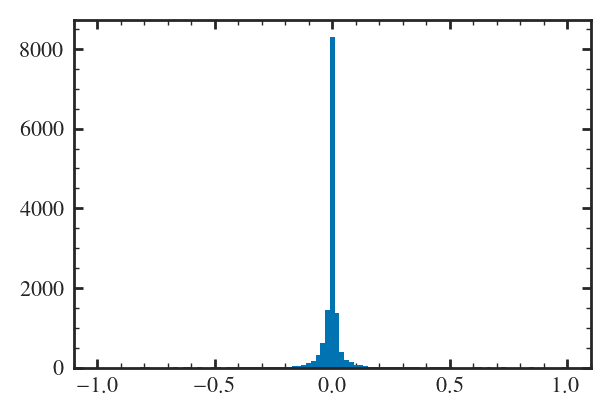

In [11]:
plt.hist((subgiants.R_gal - subgiants.R_gal_gaia), bins=np.linspace(-1, 1, 100))

(array([1.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 6.000e+00, 3.000e+00,
        6.000e+00, 2.000e+00, 6.000e+00, 6.000e+00, 9.000e+00, 1.100e+01,
        9.000e+00, 4.000e+00, 7.000e+00, 1.500e+01, 1.000e+01, 1.400e+01,
        2.000e+01, 2.800e+01, 2.700e+01, 3.000e+01, 5.600e+01, 7.800e+01,
        8.400e+01, 1.560e+02, 1.770e+02, 2.250e+02, 4.790e+02, 1.183e+03,
        3.535e+03, 7.323e+03, 5.800e+01, 1.700e+01, 1.400e+01, 1.000e+01,
        1.000e+01, 9.000e+00, 6.000e+00, 7.000e+00, 3.000e+00, 6.000e+00,
        0.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

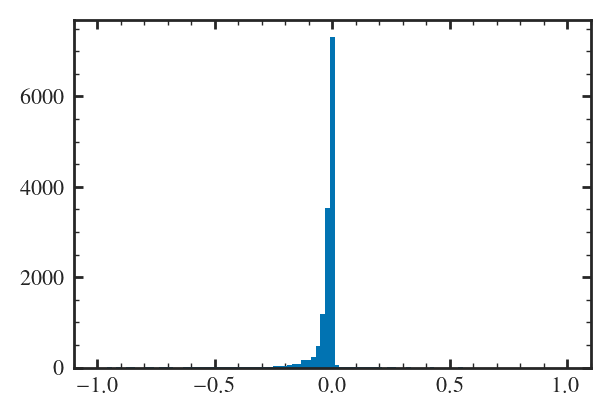

In [12]:
plt.hist((subgiants.abs_z - np.abs(subgiants.z_gal_gaia)), bins=np.linspace(-1, 1, 100))

Text(0, 0.5, 'counts')

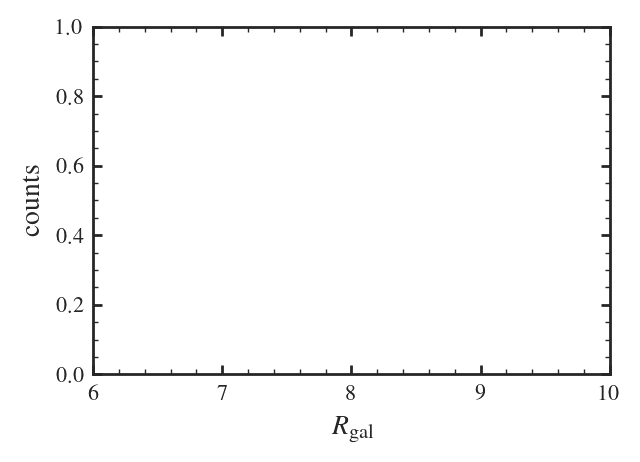

In [13]:
bins = np.arange(0, 20, 0.05)
plt.xlim(6, 10)
plt.xlabel(r"$R_{\rm gal}$")
plt.ylabel("counts")

In [14]:
cdf = ECDF(R)

In [15]:
max_R = 15.5
R_sample = np.arange(0, max_R, 0.01)
norm_cdf = cdf(R_sample)/cdf(max_R)
table = pd.DataFrame({"R": R_sample, "cdf": norm_cdf})

In [16]:
table.to_csv(surp.DATA_DIR + "/R_subgiants_cdf.csv")

In [17]:
df = surp.vice_utils.load_cdf()

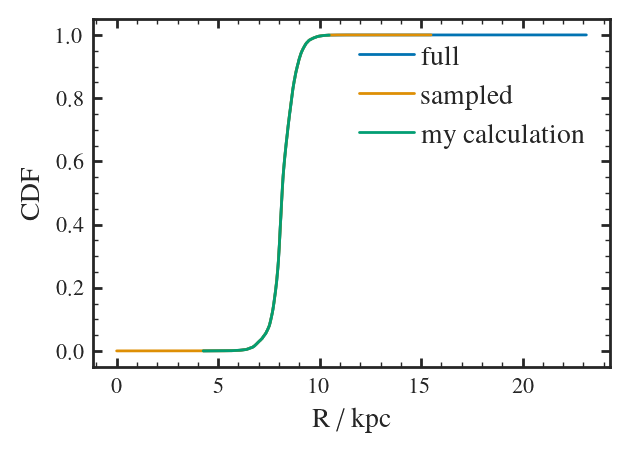

In [18]:

plt.plot(cdf.x, cdf.y, label="full")
plt.plot(df.R, df.cdf, label="sampled")
x = np.sort(R)
y = np.linspace(0, 1, len(R))
plt.plot(x[::10], y[::10], label="my calculation")
plt.xlabel("R / kpc")
plt.ylabel("CDF")
arya.Legend()